## A (brief) Introduction to Bayesian Reasoning and Statistics

#### Bryan Scott, CIERA/Northwestern, 
#### DSFP Session 19: Orientation for Cohort 7 
version 0.1 

## Part 1: Warm Up - Conditional Probability and the Law of Total Probability

One of the main objects of Bayesian inference is the conditional probability distribution. This tells us what the chance of something happening given that we know something else happened are. For example,

$$
p(Good | Dog) = 1 
$$

A related concept is the law of total probability - this just formalizes the idea that the odds of something happening must involve a sum over all of the (conditional) ways it can happen. 

$$
p(B) = \Sigma_n P(B | A_n) P(A_n)
$$

for example,

$$
p(Pet) = p(Pet| Own) p(Own) + p(Pet| Friendly) p(Friendly)
$$

One more useful bit of probability theory is that conditional probabilities can be related to each other via a simple relationship:

$$
p(A| B) = \frac{P(B|A)P(A)}{P(B)}
$$

which also holds if you swap $A \rightarrow B$. This result is sometimes called Bayes' theorem, and the interpretation of this equation (which is simply a fact about conditional probabilities) gives rise to Bayesian statistics.

## Part 2: Prior Beliefs

Let's consider the following problem. Suppose you're deciding whether to take the bus or walk to your destination. Unfortunately, you live in Chicago, so while there is a bus tracker app, it will tell you only a set of probable times you might expect the bus to arrive. Having previously solved this problem empirically, one learns not to rely on the bus tracker app's estimates. 

As such, you'll call the rate at which buses arrive $\lambda$ and use the bus schedule to set a best guess $p_0(\lambda)$ for the rate at which buses arrived. $\lambda$ is a $\textit{parameter}$ of some distribution we wish to infer. It's assumed distribution before we have observed any buses arriving, $p_0(\lambda)$ is called the $\textit{prior}$. 

## Part 3: Conditioning Beliefs on Evidence

Now that we know how often we expect the bus to arrive, we need someway to update our knowledge of $\lambda$ based on observing bus arrival times. This is called the $\textbf{likelihood}$. It tells us how our observed data changes our beliefs about the value of some parameter. 

While choosing a distribution that captures our prior beliefs about the value of a parameter often requires care, there are more clear rules governing the proper updating functions. It turns out that the right updating function for this problem is the $\textit{Poisson Distribution}$.

For most problems, you will instead use a $\textit{Gaussian distribution}$.

## Part 4: Bayes' Insight


The deep insight is that Bayesian probabilities are statements about the probability of a parameter taking on a certain value. This differs from the classical interpretation, where probability is about realizations of the data, rather than distributions over parameters. 

For example, what we care about as bus riders is the rate at which buses arrive. If we believe the next bus will arrive soon, we will likely wait for it. If we believe the bus will arrive much later, perhaps we will walk. What we want to quantify is our beliefs about the value of the rate parameter of bus arrivals. 

To make this quantitative, the probability distribution for the rate at which buses arrive $p(\tau | \lambda)$, conditioned on the time we've waited so far, is proportional to the product of our $\textit{prior}$ belief about when a bus will arrive and the $\textit{likelihood}$ - a function that tells us how our beliefs change as we observe (or don't observe) buses arriving. 

$$
p(\lambda | \tau) \propto p_0(\lambda) p(\tau | \lambda )
$$

There is a missing normalization constant here, sometimes called the $\textbf{evidence}$ or the $\textbf{marginal likelihood}$ - we will return to this point in detail in the Bayesian inference session, but for now, you can calculate the evidence by asserting that $\Sigma_{\tau} p(\lambda | \tau) = 1$. For most problems we can neglect this constant since we only care about the maximum of the probability distribution. When it does matter, we often use the law of total probability to calculate this term. More on this in a future session.

What this equation says is that my $\textit{belief}$ about the frequency at which buses arrive depends on my prior belief about how often the bus should come and a factor that tells me how to update my belief based on how long I've been waiting at the bus stop.

## Part 5: Putting this into practice

Now, in the rest of this notebook, work out the posterior estimate for the rate at which buses arrive based on your wait time so far. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import scipy function for gamma function
from scipy.special import gamma

The choice of prior is, in general, a subtle problem that we will return to. In the analysis of wait times, it is common to select a prior from the $\Gamma$ distribution family described by the equation:

$$
p_0 (\lambda) = \frac{\beta^a \lambda^{a-1} e^{-\beta \lambda}}{\Gamma(a)}
$$

Begin by discussing with your partner what each of these parameters means in the context of a wait time problem.

In [26]:
# Plot a gamma function with the gamma distribution from scipy
def plot_gamma(a, b, lbd_min, lbd_max, n_points):
    lbd = np.linspace(lbd_min, lbd_max, n_points)
    p = np.exp(-b*lbd)*(b*lbd)**(a)/gamma(a)/lbd
    plt.plot(lbd, p, label = r'$a$ = ' + str(a) + r', $\beta$ = ' + str(b))
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'p($\lambda$)')
    # plt.title(r'p($\lambda$) pdf for a = ' + str(a) + r' and $\beta$ = ' + str(b))

Next, either use a built in function from scipy or write your own function for the $\Gamma(a)$ distribution.

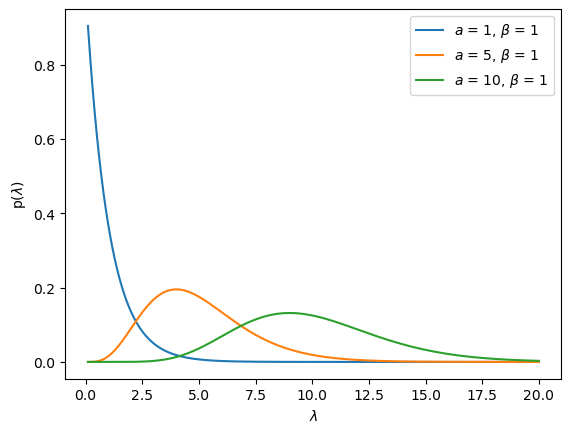

In [46]:
plot_gamma(1, 1, 0.1, 20, 1000)
plot_gamma(5, 1, 0.1, 20, 1000)
plot_gamma(10, 1, 0.1, 20, 1000)
plt.legend()
plt.show()

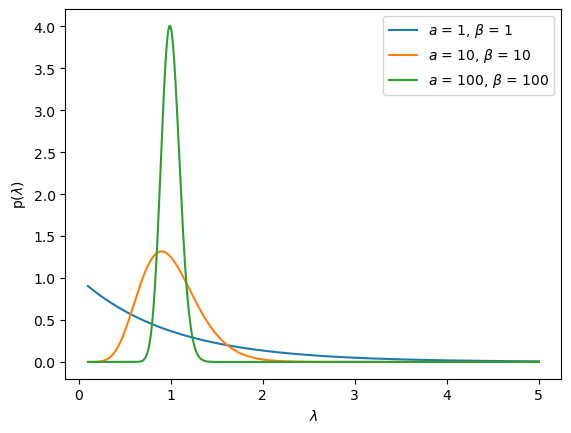

In [ ]:
plot_gamma(1, 1, 0.1, 5, 1000)
plot_gamma(10, 10, 0.1, 5, 1000)
plot_gamma(100, 100, 0.1, 5, 1000)
plt.legend()
plt.show()

$\frac{a}{\beta}$ represents the average rate of bus arrival. $\beta$ gives how accurate the buses are following the schedule (or how much scatter in the pdf) 


Next, we need to pick a likelihood function that updates our estimate of the rate based on observed wait times. We assume buses arrive as a Poisson process with a certain rate, in other words, our likelihood function is

p(t | $\lambda$) = $\lambda t e^{-\lambda t}$

plot this as a function of $\lambda$. You can use either a built in function or write your own. 

In [39]:
# Plot the Poisson distribution
def plot_poisson(t, lbd_min, lbd_max, lbd_step):
    lbd = np.arange(lbd_min, lbd_max, lbd_step)
    p = np.exp(-lbd*t)*lbd*t
    plt.plot(lbd, p, label = r'$t$ = ' + str(t))
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'p(t|$\lambda$)')
    plt.title(r'p(t|$\lambda$) pdf for t = ' + str(t))
    plt.show()


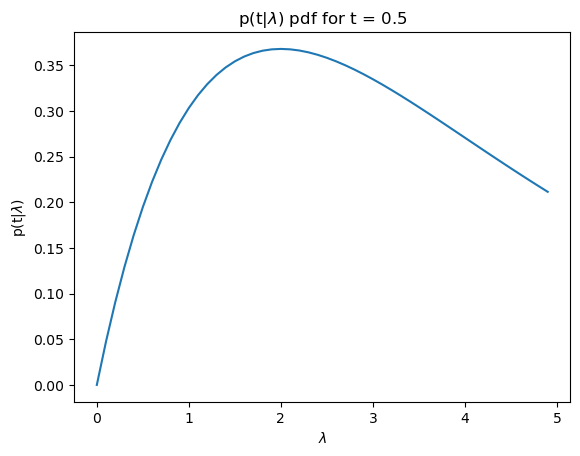

In [41]:
plot_poisson(0.5, 0, 5, 0.1)

Next, we use Bayes' theorem to calculate the posterior estimate of the rate at which buses arrive based on the time we have waited.

p($\lambda$ | t) $\propto$ p(t|$\lambda$) p($\lambda$)

(note that we are ignoring the denominator here - you can calculate it by summing over the right hand side for all values of $\lambda$ - it is just a normalization constant.)

Plot your posteriors as a function of the unknown parameter $\lambda$ for many different values of the observed wait time. 

In [50]:
def posterior(a, b, t, lbd_min, lbd_max, n_points):
    lbd = np.linspace(lbd_min, lbd_max, n_points)
    prior = np.exp(-b*lbd)*(b*lbd)**(a)/gamma(a)/lbd
    likelihood = np.exp(-lbd*t)*lbd*t
    posterior = prior*likelihood
    return lbd, posterior

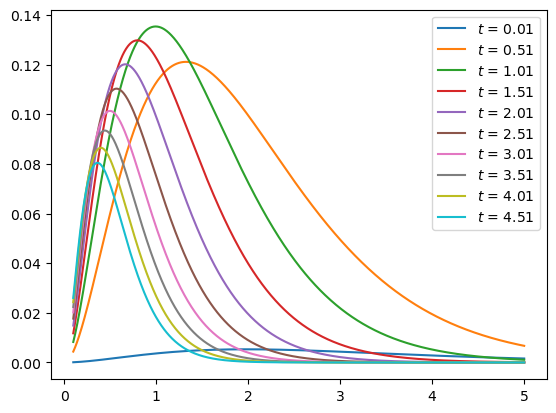

In [54]:
# plot the posterior with different values of t
for t in list(np.arange(0.01, 5, 0.5)):
    lbd, p_posterior = posterior(2, 1, t, 0.1, 5, 1000)
    plt.plot(lbd, p_posterior, label = r'$t$ = ' + str(t))
# lbd, posterior = posterior(2, 1, 0.5, 0.1, 5, 1000)
plt.legend()

Based on your plots, answer the following questions: 
- What happens to your estimate of the rate at which buses arrive as a function of how long you've waited for the first bus? What does this imply about your estimate of the time until the next bus will arrive?
- What does the shape of these distributions tell you about the $\Gamma$ distribution and choice of Poisson likelihood for this problem. Is this behavior generalizable? 

(challenge) If you've answered the above questions, now solve this problem analytically and explicitly compute the expected time until the next bus arrives using your posterior distribution for the rate at which buses arrive. 